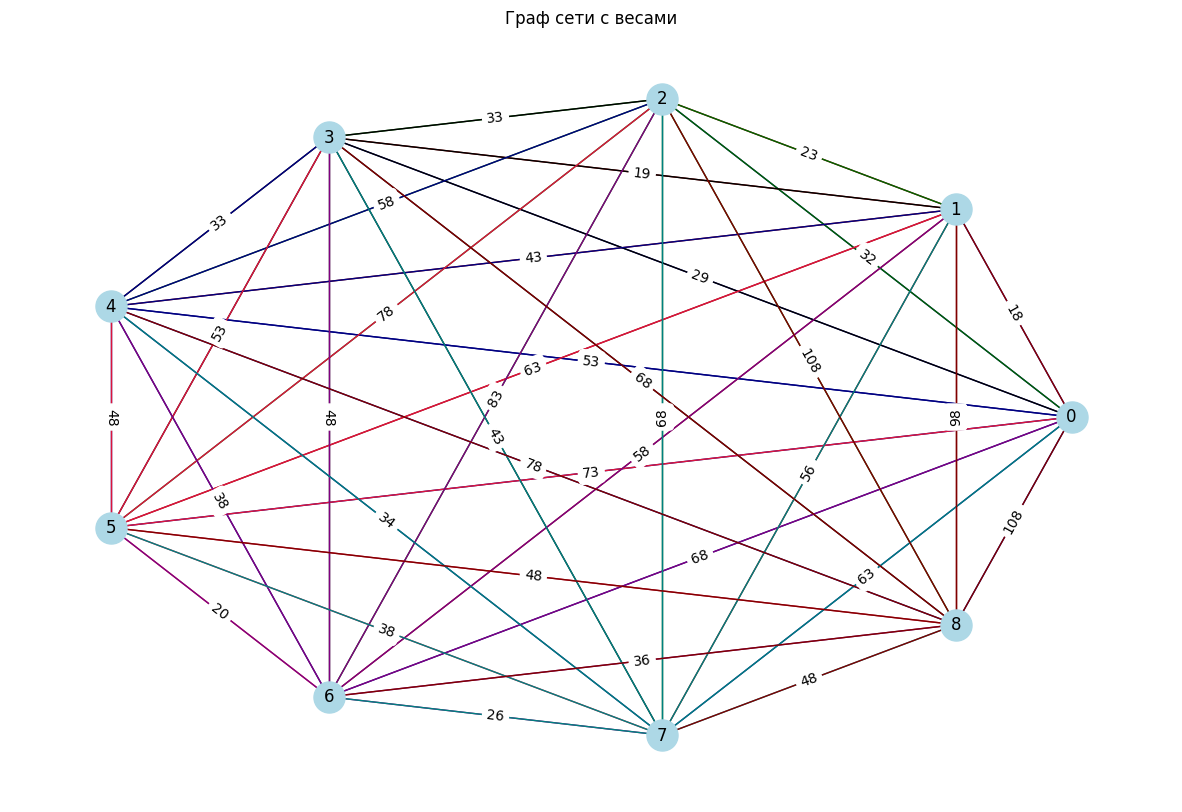

In [1]:
# Импортируем необходимые библиотеки
import networkx as nx
import matplotlib.pyplot as plt

# Рисуем граф сети
distances = [
    [0, 18, 32, 29, 53, 73, 68, 63, 108],
    [18, 0, 23, 19, 43, 63, 58, 56, 98],
    [32, 23, 0, 33, 58, 78, 83, 68, 108],
    [29, 19, 33, 0, 33, 53, 48, 43, 68],
    [53, 43, 58, 33, 0, 48, 38, 34, 78],
    [73, 63, 78, 53, 48, 0, 20, 38, 48],
    [68, 58, 83, 48, 38, 20, 0, 26, 36],
    [63, 56, 68, 43, 34, 38, 26, 0, 48],
    [108, 98, 108, 68, 78, 48, 36, 48, 0]
]

def new_graph_from_matrix(distances: list[int]) -> nx.Graph:
    # Создаем граф
    G = nx.Graph()
    
    # Добавляем узлы
    n = len(distances)
    for i in range(n):
        G.add_node(i)
    
    # Добавляем ребра с весами
    for i in range(n):
        for j in range(i+1, n):
            if distances[i][j] > 0:  # добавляем ребро, если есть связь
                G.add_edge(i, j, weight=distances[i][j])
    return G


def visualize_distance_matrix(G: nx.Graph):
    # Создаем макет для графа
    pos = nx.circular_layout(G)
    
    # Рисуем граф
    plt.figure(figsize=(15, 10))
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    colors = [
        "darkblue", 
        "darkred", 
        "darkgreen", 
        "black", 
        "navy", 
        "crimson", 
        "purple", 
        "teal", 
        "maroon"
    ]
    # Рисуем ребра и красим их разными цветами
    for c, i in zip(colors, range(0, 9)):
        edgelist = [(u, v) for (u, v) in G.edges() if u == i or v == i]
        nx.draw_networkx_edges(G, pos, edgelist=edgelist, edge_color=c)

    # Добавляем метки вершин
    nx.draw_networkx_labels(G, pos)
    
    # Добавляем веса ребер
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title('Граф сети с весами')
    plt.axis('off')
    plt.show()

# Визуализируем сеть
G = new_graph_from_matrix(distances=distances)
visualize_distance_matrix(G)

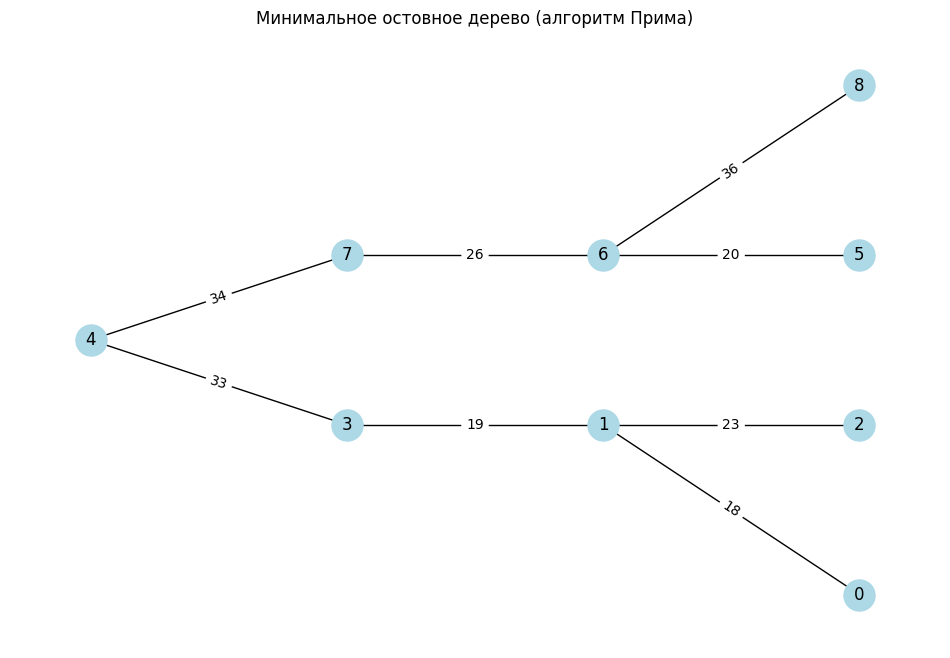

In [2]:
# Находим древовидную иерархическую сеть минимальной длины используя алгоритм Прима
T = nx.minimum_spanning_tree(G, algorithm='prim')

def visualize_mst(T):
    # Создаем шаблон для графа
    # Располагаем узлы в соответствии с алгоритмом поиска по ширине (начальная вершина подобрана вручную)
    pos = nx.bfs_layout(T, 4)
    
    plt.figure(figsize=(12, 8))
    # Рисуем узлы
    nx.draw_networkx_nodes(T, pos, node_color='lightblue', node_size=500)
    
    # Рисуем ребра
    nx.draw_networkx_edges(T, pos)
    
    # Добавляем метки вершин
    nx.draw_networkx_labels(T, pos)
    
    # Добавляем веса ребер
    edge_labels = nx.get_edge_attributes(T, 'weight')
    nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels)
    
    plt.title('Минимальное остовное дерево (алгоритм Прима)')
    plt.axis('off')
    plt.show()

# Визуализируем минимальное остовное дерево
visualize_mst(T)